In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/processed/cleaned_amazon.csv')
df_riders = df.groupby('Agent_Age').agg({
    'Pickup_Delay_Minutes': 'mean',
    'Delivery_Speed_KMPH': 'mean',
    'Distance_KM': 'mean',
    'Agent_Rating': 'mean'
}).reset_index()

In [16]:
def classify_loyalty(row):
    if row['Agent_Rating'] >= 4.67 and row['Pickup_Delay_Minutes'] <= 9.90:
        return 'Gold'
    elif row['Agent_Rating'] >= 4.62 and row['Pickup_Delay_Minutes'] <= 10.05:
        return 'Silver'
    else:
        return 'Bronze'

df_riders['Loyalty_Tier'] = df_riders.apply(classify_loyalty, axis=1)

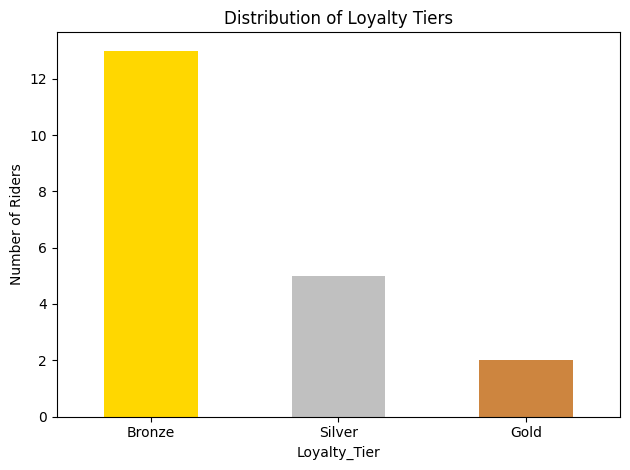

In [17]:
import matplotlib.pyplot as plt

df_riders['Loyalty_Tier'].value_counts().plot(kind='bar', color=['gold', 'silver', 'peru'])
plt.title('Distribution of Loyalty Tiers')
plt.ylabel('Number of Riders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../reports/screenshots/loyalty_tiers.png')
plt.show()

In [ ]:
# Insights:

#1. The majority of riders fall under the Bronze tier,
#indicating there is considerable room for improvement in either their pickup delays or customer ratings.

#2. Only 2 riders qualified as Gold, suggesting that the defined thresholds for top tier performance are strict and selective 
# which is possibly useful for elite level incentive programs.

#3. Silver riders represent a transitional group, performing better than average but still not consistent enough to reach Gold,
# These riders may respond well to targeted training or motivational quests.

# 4. The loyalty segmentation criteria were based on a combination of rating (≥ 4.67 for Gold) and operational delay (≤ 9.90 minutes),\
#which aligns with the company's focus on both customer satisfaction and delivery efficiency.

#5. This distribution can guide resource allocation 
# for example prioritizing support or training for Bronze tier riders while designing retention rewards for Gold performers.


In [18]:
df_riders.to_csv('../data/processed/riders_loyalty.csv', index=False)